In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import csv
from mpl_toolkits.mplot3d import Axes3D

(10, 2)


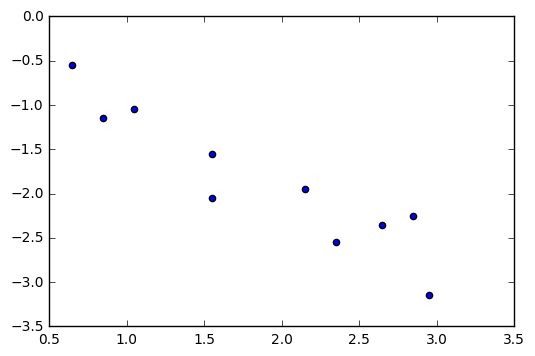

In [5]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-2d.dat", skip_header=False,dtype='float')

# center data
mean = np.mean(Data)
centered = Data - mean
print (centered.shape)
plt.scatter(centered[:,0],centered[:,1])
plt.show()

In [6]:
# b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
# same data points in the coordinate system spanned by the 2 PCs.

# 1. Cov Matrix
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

# 3.plot data points in the coordinate systems spanned by the 2 PCs.

array([-0.6778734 , -0.73517866])

1.2840277121727839

In [65]:
#we switch the vectors ,because the second one has a higher eigenvalue
evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    


first PC:
[-0.73517866  0.6778734 ]
eigenvalue of first PC:
1.28402771217
second PC:
[-0.6778734  -0.73517866]
eigenvalue of second PC:
0.0490833989383


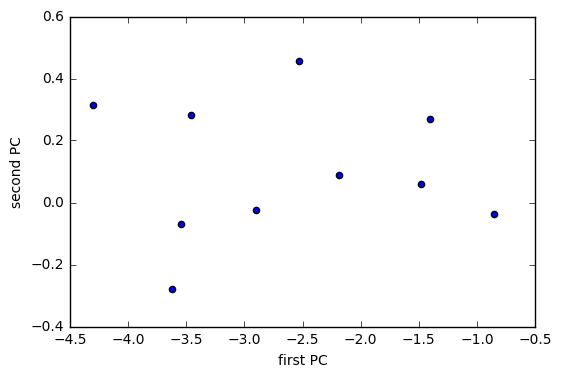

In [66]:
print 'first PC:' 
print evectors[0]
print 'eigenvalue of first PC:'
print evalues[0]
print 'second PC:' 
print evectors[1]
print 'eigenvalue of second PC:'
print evalues[1]
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()


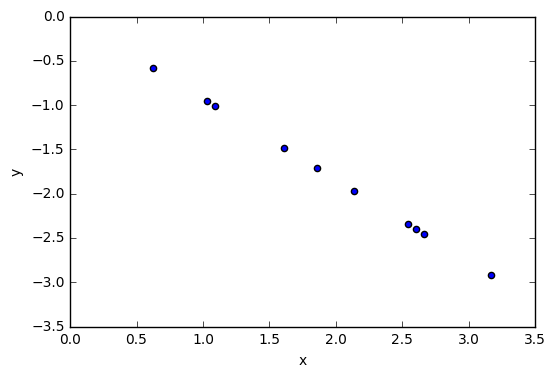

In [78]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  


plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction1[:,0],reconstruction1[:,1])
plt.show()

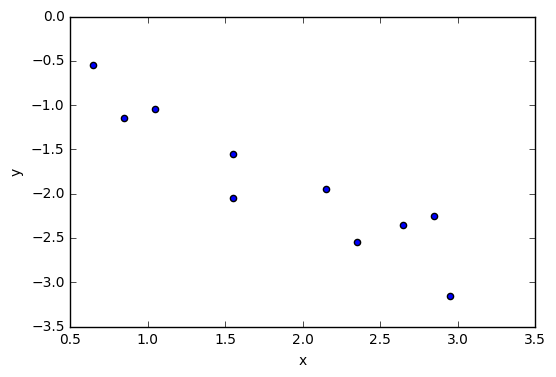

In [76]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
    
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(reconstruction2[:,0],reconstruction2[:,1])
plt.show()

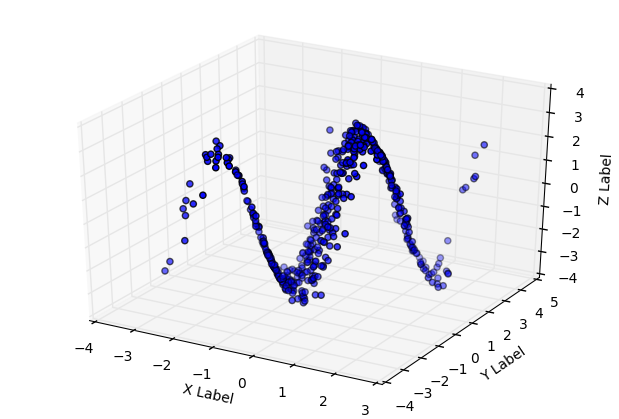

In [80]:
# a) Load the dataset, center & make scatter plot

# load data
Data = np.genfromtxt("pca-data-3d.txt",delimiter=',', skip_header=True,dtype='float')
# center data
mean = np.mean(Data)
centered = Data - mean

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(centered[:,0], centered[:,1], zs=centered[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [89]:
C = np.cov(centered.T)
# 2. get eigenvectors and eigenvalues of cov matrix, w values, v vectors
w,v = np.linalg.eigh(C)

evectors = v[::-1]
evalues = w[::-1]

centered_pca = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    centered_pca[i,0] = evectors[0].T.dot(centered[i])
    centered_pca[i,1] = evectors[1].T.dot(centered[i])
    centered_pca[i,2] = evectors[2].T.dot(centered[i])
    

coordinate system spanned by PC1 and PC2


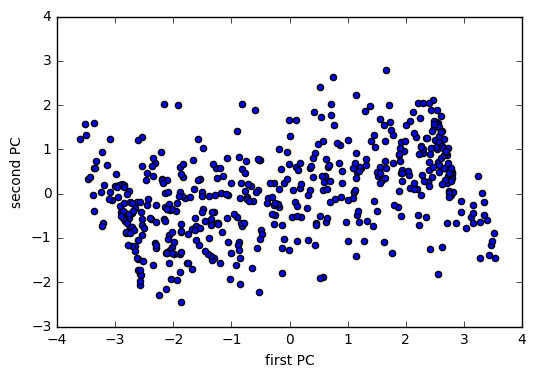

In [91]:
print 'coordinate system spanned by PC1 and PC2'
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.scatter(centered_pca[:,0],centered_pca[:,1])
plt.show()

coordinate system spanned by PC1 and PC3


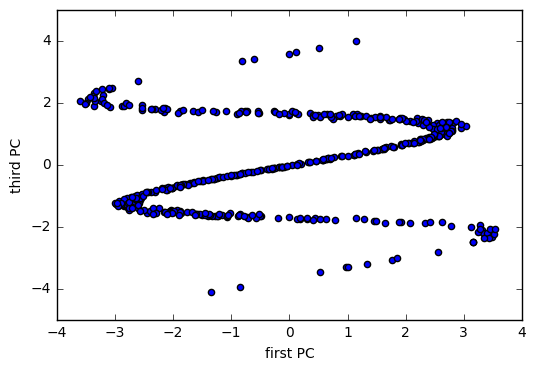

In [92]:
print 'coordinate system spanned by PC1 and PC3'
plt.xlabel('first PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,0],centered_pca[:,2])
plt.show()

coordinate system spanned by PC2 and PC3


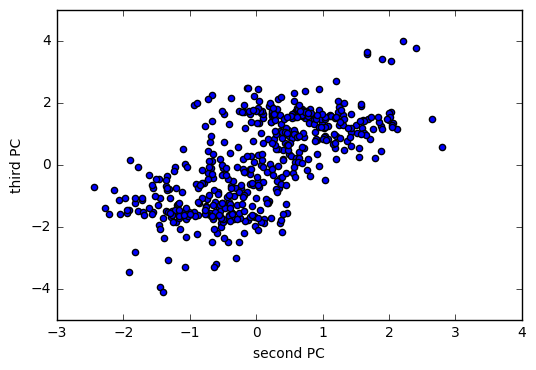

In [93]:
print 'coordinate system spanned by PC2 and PC3'
plt.xlabel('second PC')
plt.ylabel('third PC')
plt.scatter(centered_pca[:,1],centered_pca[:,2])
plt.show()

reconstruction by using only PC1


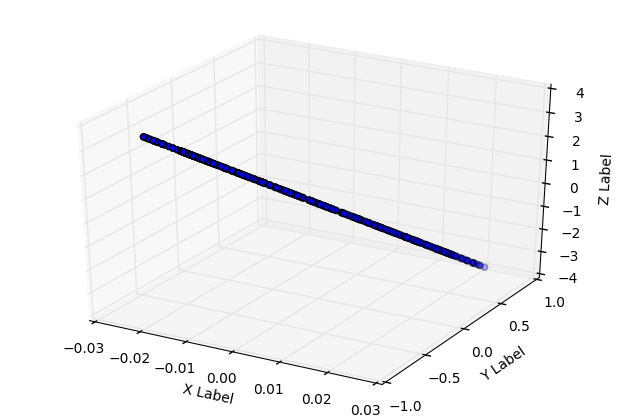

In [98]:
reconstruction1 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction1[i] = evectors[0]*centered_pca[i,0]
  

print 'reconstruction by using only PC1'    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction1[:,0], reconstruction1[:,1], zs=reconstruction1[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

reconstruction by using PC1 and PC2


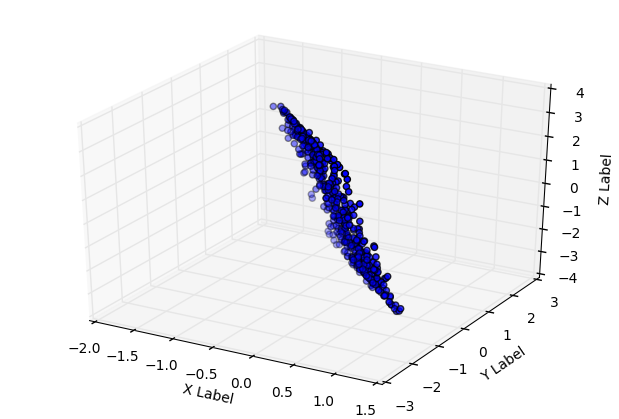

In [99]:
reconstruction2 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction2[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1]
print 'reconstruction by using PC1 and PC2'    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction2[:,0], reconstruction2[:,1], zs=reconstruction2[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

reconstruction by using all PCs 


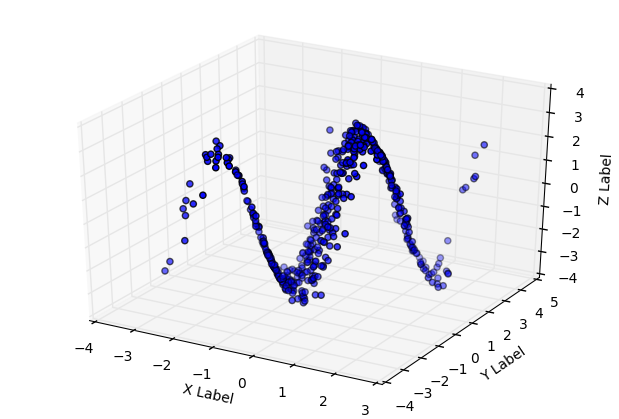

In [100]:
reconstruction3 = np.zeros(centered.shape)

for i in range(centered.shape[0]):
    reconstruction3[i] = evectors[0]*centered_pca[i,0] + evectors[1]*centered_pca[i,1] + evectors[2]*centered_pca[i,2]
print 'reconstruction by using all PCs '    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(reconstruction3[:,0], reconstruction3[:,1], zs=reconstruction3[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()